<a href="https://colab.research.google.com/github/zenpp/Data-Science-Mini-Project/blob/master/Iris/Iris_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
#import data
iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_head = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
iris = pd.read_csv(iris_url,names=col_head)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [0]:
#split features and labels
X = iris.iloc[:,:-1].values
y = iris.iloc[:,4].values

In [0]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [0]:
#feature scaling because data has a broad value, so we should normalize it first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

array([-0.78369832,  1.05779689, -1.23422342, -1.24168677])

In [0]:
#training with k=5
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
#prediction
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], dtype=object)

In [0]:
#model evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [0]:
#try k = [1,100] and see the result of each k
err = []
for i in range(1,100):
  classifier = KNeighborsClassifier(n_neighbors = i)
  classifier.fit(X_train,y_train)
  pred_i = classifier.predict(X_test)
  err.append(np.mean(pred_i != y_test))
err

[0.06666666666666667,
 0.08888888888888889,
 0.044444444444444446,
 0.06666666666666667,
 0.044444444444444446,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.044444444444444446,
 0.044444444444444446,
 0.022222222222222223,
 0.044444444444444446,
 0.022222222222222223,
 0.044444444444444446,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.06666666666666667,
 0.08888888888888889,
 0.08888888888888889,
 0.13333333333333333,
 0.1111111111111111,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.1111111111111111,
 0.17777777777777778,
 0.17777777777777778,
 0.17777777777777778,
 0.15555555555555556,
 0.2,
 0.17777777777777778,
 0.2222222222222222,
 0.2222222222222222,
 0.2222222222222222,
 0.17777777777777778,
 0.2,
 0.2,
 0.2222222222222222,
 0.2,
 0.2,
 0.2,
 0.2222222222222222,
 0.2222222222222222,
 0.2222222222222222,
 0.2,
 0.2222

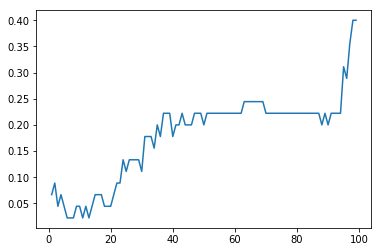

In [0]:
import seaborn as sns
sns.lineplot(x = np.arange(1,100) , y = err)

Seems like KNN give a good result on this data set
only when k < 20